<a href="https://colab.research.google.com/github/thiago2608santana/Natural_Language_Processing_with_Python/blob/main/Text_Classification_Length_Punct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
df = pd.read_csv('/content/drive/MyDrive/NLP_with_Python_Datasets/smsspamcollection.csv')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111.0,9.0
1,ham,Ok lar... Joking wif u oni...,29.0,6.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155.0,6.0
3,ham,U dun say so early hor... U c already then say...,49.0,6.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61.0,2.0


In [4]:
df.isnull().sum()

label      0
message    0
length     2
punct      2
dtype: int64

In [5]:
len(df)

5574

In [6]:
df.dropna(inplace = True)

In [7]:
len(df)

5572

In [8]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [9]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

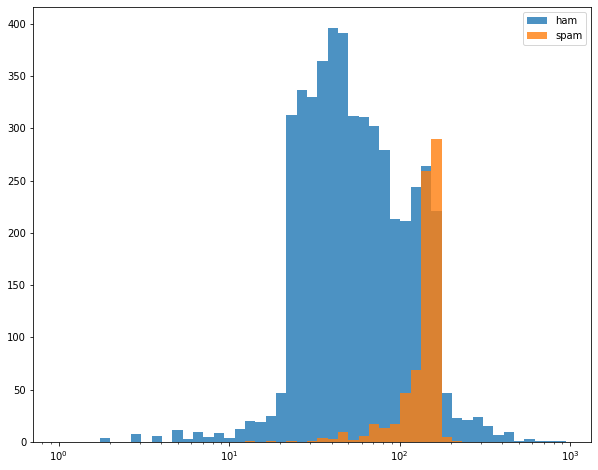

In [10]:
plt.figure(figsize=(10,8))
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label'] == 'ham']['length'], bins=bins, alpha=0.8)
plt.hist(df[df['label'] == 'spam']['length'], bins=bins, alpha=0.8)
plt.legend(('ham', 'spam'))

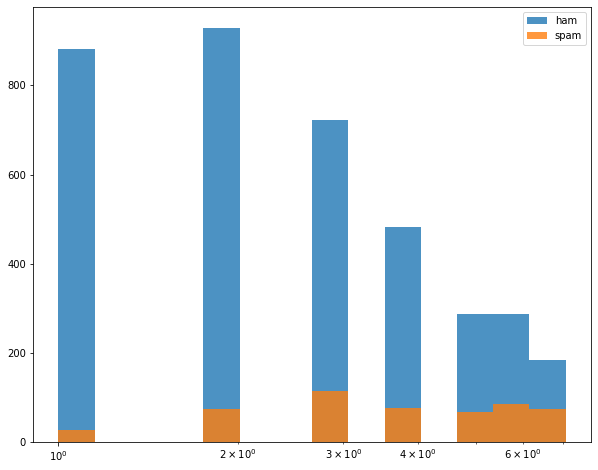

In [11]:
plt.figure(figsize=(10,8))
plt.xscale('log')
bins = 1.15**(np.arange(0,15))
plt.hist(df[df['label'] == 'ham']['punct'], bins=bins, alpha=0.8)
plt.hist(df[df['label'] == 'spam']['punct'], bins=bins, alpha=0.8)
plt.legend(('ham', 'spam'))

# X feature data

In [13]:
X = df[['length', 'punct']]

# y target data

In [14]:
y = df['label']

# Split data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
X_train.shape

(3900, 2)

In [18]:
X_test.shape

(1672, 2)

# Logistic Regression

In [23]:
lr_model = LogisticRegression(solver='lbfgs')

In [24]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [25]:
predictions = lr_model.predict(X_test)

In [28]:
print(confusion_matrix(y_test, predictions))

[[1404   44]
 [ 219    5]]


In [29]:
df_results = pd.DataFrame(confusion_matrix(y_test, predictions), index=['ham', 'spam'], columns=['ham', 'spam'])

In [30]:
df_results

,ham,spam
ham,1404,44
spam,219,5


In [31]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [33]:
print(accuracy_score(y_test, predictions))

0.8427033492822966


# Naive Bayes

In [35]:
nb_model = MultinomialNB()

In [36]:
nb_model.fit(X_train, y_train)

MultinomialNB()

In [37]:
predictions = lr_model.predict(X_test)

In [38]:
print(confusion_matrix(y_test, predictions))

[[1404   44]
 [ 219    5]]


In [39]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [40]:
print(accuracy_score(y_test, predictions))

0.8427033492822966


# Support Vector Machine

In [42]:
svc_model = SVC(gamma='auto')

In [43]:
svc_model.fit(X_train, y_train)

SVC(gamma='auto')

In [44]:
predictions = svc_model.predict(X_test)

In [45]:
print(confusion_matrix(y_test, predictions))

[[1373   75]
 [ 121  103]]


In [46]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.92      0.95      0.93      1448
        spam       0.58      0.46      0.51       224

    accuracy                           0.88      1672
   macro avg       0.75      0.70      0.72      1672
weighted avg       0.87      0.88      0.88      1672



In [47]:
print(accuracy_score(y_test, predictions))

0.8827751196172249
